Importing Libraries.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

Loading Data

In [45]:
df = pd.read_csv('heart_disease.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63  1.0   3     145.0   233    1        0    150.0      0      2.3    0.0   0     1       1
1   37  1.0   2     130.0   250    0        1    187.0      0      3.5    0.0   0     2       1
2   41  0.0   1     130.0   204    0        0    172.0      0      1.4    2.0   0     2       1
3   56  1.0   1     120.0   236    0        1    178.0      0      0.8    2.0   0     2       1
4   57  0.0   0     120.0   354    0        1    163.0      1      0.6    2.0   0     2       1


EDA (basic)

              age         sex          cp  ...          ca        thal      target
count  303.000000  302.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.685430    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.465115    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


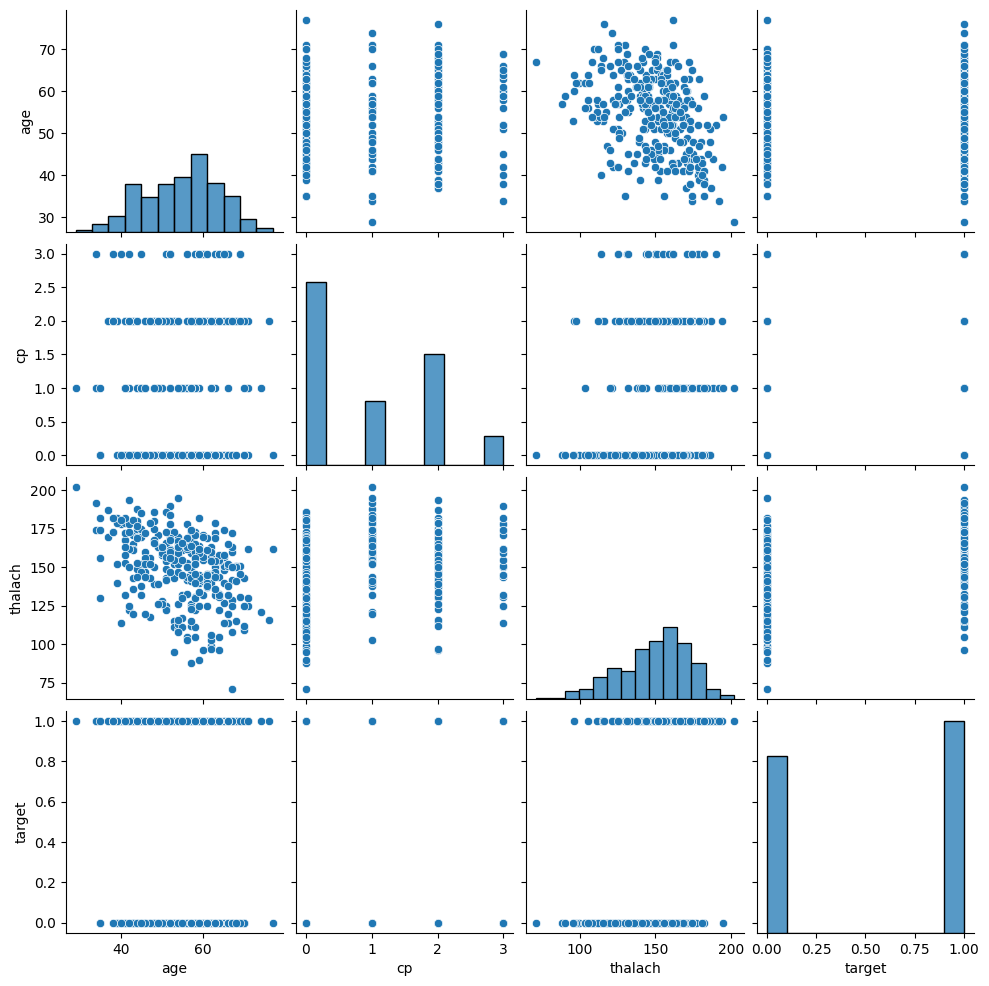

In [46]:
print(df.describe())  # Check summary statistics
sns.pairplot(df[['age', 'cp', 'thalach', 'target']])
plt.show()

HeatMap to sho correlation

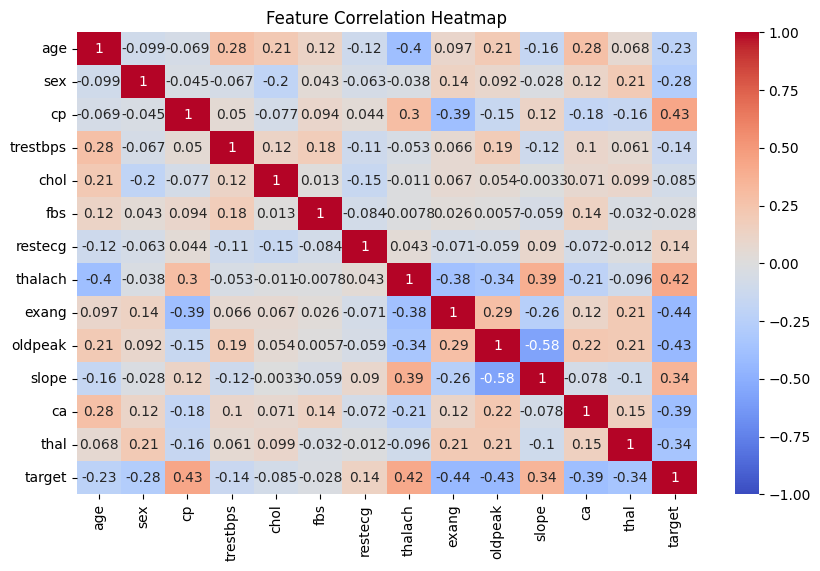

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Feature and Target Selection

In [51]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
df_filled_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)
print("\nDataFrame after filling missing values with mean:")
print(df_filled_mean)
X = df_filled_mean[['age', 'cp', 'thalach']]
y = df_filled_mean['target']
print(X)
print(y)


DataFrame after filling missing values with mean:
      age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal  target
0    63.0  1.0  3.0     145.0  233.0  1.0  ...    0.0      2.3    0.0  0.0   1.0     1.0
1    37.0  1.0  2.0     130.0  250.0  0.0  ...    0.0      3.5    0.0  0.0   2.0     1.0
2    41.0  0.0  1.0     130.0  204.0  0.0  ...    0.0      1.4    2.0  0.0   2.0     1.0
3    56.0  1.0  1.0     120.0  236.0  0.0  ...    0.0      0.8    2.0  0.0   2.0     1.0
4    57.0  0.0  0.0     120.0  354.0  0.0  ...    1.0      0.6    2.0  0.0   2.0     1.0
..    ...  ...  ...       ...    ...  ...  ...    ...      ...    ...  ...   ...     ...
298  57.0  0.0  0.0     140.0  241.0  0.0  ...    1.0      0.2    1.0  0.0   3.0     0.0
299  45.0  1.0  3.0     110.0  264.0  0.0  ...    0.0      1.2    1.0  0.0   3.0     0.0
300  68.0  1.0  0.0     144.0  193.0  1.0  ...    0.0      3.4    1.0  2.0   3.0     0.0
301  57.0  1.0  0.0     130.0  131.0  0.0  ...    1.0      

Splitting The Data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Initialization and training

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predictions and performance metrics

In [55]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

Model Performance Metrics

In [56]:
print(f"Accuracy:{accuracy_score(y_test, y_pred):.2f}")
print("Classification report: ")
print(classification_report(y_test, y_pred))

Accuracy:0.80
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        29
         1.0       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Confusion Metrics

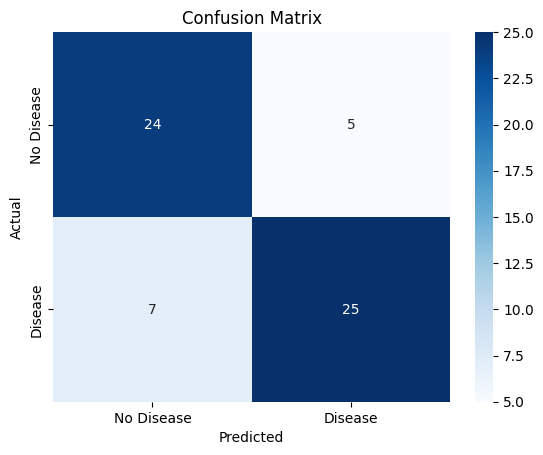

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'],yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

roc Curve and AUC

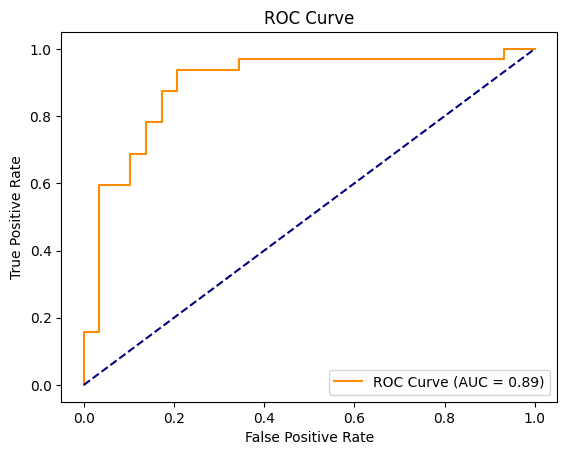

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1],[0,1],linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

User input functions for prediction

In [60]:
def predict_heart_disese():
  age = int(input("Enter age: "))
  cp = int(input("Enter chest pain type (0-3): "))
  thalach = int(input("Enter maximum heart rate achieved:"))

  user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
  prediction = model.predict(user_data)

  result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
  print(f"Prediction: {result}")

predict_heart_disese()

Enter age: 34
Enter chest pain type (0-3): 2
Enter maximum heart rate achieved:4
Prediction: No Heart Disease
